In [1]:
import sys
if "/Users/raymond/code/FinalProject563" not in sys.path:
    sys.path.append("/Users/raymond/code/FinalProject563")
import torch
import pickle
import glob
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas
import time
import os

import connect_four
import mcts
import connect_net
import connect_plot
import evaluation
import utils
import runner
%matplotlib inline
%load_ext autoreload
%autoreload 2
os.chdir("/Users/raymond/code/FinalProject563")

In [54]:
# path = utils.get_training_model_path(trial="conv401", iteration=60)
# nnet = connect_net.load_model(path=path, klass=connect_net.ConnectNet3, log=False)
path = utils.get_training_model_path(trial="conv402", iteration=33)
nnet = connect_net.load_model(path=path, klass=connect_net.ConnectNet4, log=False)

In [180]:
num_mcts_sims = 128
random_move = 0

gc = connect_four.GameCache()
p1_nc = connect_net.NetworkCache(nnet=nnet)
p1_mcts = mcts.NetworkMCTS(c=1, game_cache=gc, network_cache=p1_nc)

# offset = random.randint(0, 1)
offset = 0
move = 1
state = connect_four.start_state()
rep = connect_four.to_rep(state=state)

<Figure size 432x288 with 0 Axes>

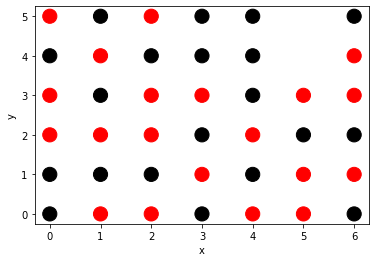

In [256]:
connect_plot.print_board((-1)**(move + offset)*state)

In [255]:
if (move + offset) % 2 == 1:
    p1_mcts.simulate_moves(num_mcts_sims=num_mcts_sims, state=state, rep=rep)
    
    print(p1_mcts.get_best_eval(rep=rep))
    if move <= random_move * 2:
        a, _ = p1_mcts.get_random_action(rep=rep)
    else:
        a, _ = p1_mcts.get_best_action(rep=rep)
else:
    a = int(input("Enter a move"))

print(f"Made move {a}")
next_state, next_rep = gc.next_state_rep(state=state, rep=rep, action=a)
ge = gc.game_ended(state=next_state, rep=next_rep)

if ge is not None:
    print("Game Ended")
    winner = -ge

move += 1
state, rep = next_state, next_rep

Enter a move5
Made move 5
Game Ended
